# QisKit介绍

这是介绍使用QisKit的使用样板工程。

## 准备性工作

1. 引入必要的数据处理模块numpy和pandas；
2. 设定matplotlib绘图的风格；
3. 引入QisKit库并打印版本信息。

In [1]:
# Import necessary data-processing modules
import numpy as np
import pandas as pd

# Control matplotlib style (white background)
%matplotlib inline
from matplotlib import style
style.use('seaborn-white')

# Import QisKit
import qiskit
import qiskit.tools.jupyter
%qiskit_version_table

## 模拟器

在本地测试QisKit，需要使用QASM的模拟器作为运行的后端。

In [2]:
simulator = qiskit.providers.aer.QasmSimulator()
print('Prepare QASM simulator {}'.format(simulator))

Prepare QASM simulator qasm_simulator


## 量子线路

为展现QisKit的能力，这里设计一个相对简单的量子线路，包括4个量子比特，使用到了单比特量子门（H门）、两比特门（CX门）和三比特门（CCX门）。

In [3]:
def demo0_circuit():
    circuit = qiskit.QuantumCircuit(4, 2)
    circuit.h(0)
    circuit.h(1)
    circuit.barrier()
    circuit.cx(1, 2)
    circuit.cx(0, 2)
    circuit.ccx(0, 1, 3)
    circuit.barrier()
    circuit.measure([2, 3], [0, 1])
    return circuit

c0 = demo0_circuit()
print('Circuit of Demo 0:')
print(c0)

Circuit of Demo 0:
     ┌───┐ ░                 ░       
q_0: ┤ H ├─░────────■────■───░───────
     ├───┤ ░        │    │   ░       
q_1: ┤ H ├─░───■────┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1 


## 汇编

通过`transpile`函数将量子线路转换为模拟器能够识别的QASM量子汇编，打印生成汇编的数据，可以看到，汇编的过程，就是将各个门转换为操作序列，每一步步骤包括操作的信息、涉及的量子比特，以及测量到经典比特位的对应关系。

In [4]:
qasm0 = qiskit.transpile(c0, simulator)
print('QASM of circuit 0')
qasm0.data

QASM of circuit 0


[(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0)], []), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 1)], []), (Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 2)], []), (Instruction(name='ccx', num_qubits=3, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 3)], []), (Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(Qua

## 运行并显示结果

使用准备好的模拟器运行线路转换得到的QASM，运行结束后展现结果。

In [5]:
job0 = simulator.run(qasm0, shots=1000)
print('Job of circuit 0: {}'.format(job0))

Job of circuit 0: <qiskit.providers.aer.jobs.aerjob.AerJob object at 0x7f8a62af80d0>


In [6]:
rst0 = job0.result()
print('Result of circuit 0: {}'.format(rst0))

Result of circuit 0: Result(backend_name='qasm_simulator', backend_version='0.10.2', qobj_id='589bd57a-201f-42e2-a9bc-07443bd56fd3', job_id='a41d0761-2a91-44b8-a0cc-3d9f3f9f4f1c', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 513, '0x2': 270, '0x0': 217}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=4, name='circuit-3', qreg_sizes=[['q', 4]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3]]), status=DONE, seed_simulator=2007786259, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'parallel_state_update': 4, 'parallel_shots': 1, 'device': 'CPU', 'active_input_qubits': [0, 1, 2, 3], 'measure_sampling': True, 'num_clbits': 2, 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'num_qubits': 4, 'method': 'statevector', 'fusion': {'applied': False, 'max_fused_qubits': 5, 

In [7]:
rst0.get_counts(), rst0.get_counts(qasm0)

({'01': 513, '10': 270, '00': 217}, {'01': 513, '10': 270, '00': 217})

## 可视化

QisKit包含大量的可视化工具，这里展示2种较为常用的功能：

1. 首先是线路的绘制，直接调用线路的`draw`函数即可；
2. 其次是使用柱状图显示结果的分布，需要使用`qiskit.visualization.plot_histogram`函数。

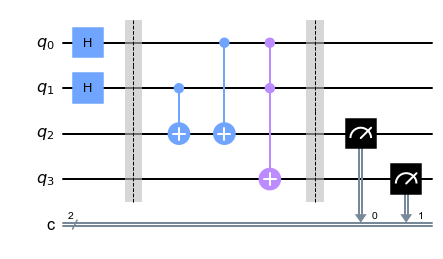

In [8]:
c0.draw()

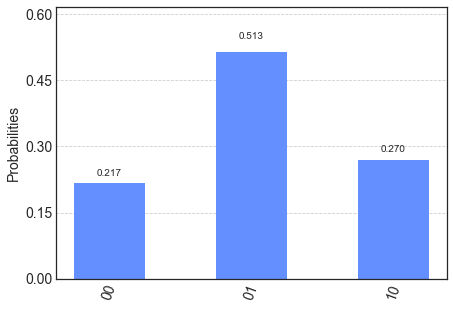

In [9]:
qiskit.visualization.plot_histogram(rst0.get_counts())